# Evaluation of deg$_{Chl}$ parameter variation
# Chlorophyll degradation rate
#### Control: run 'mo12', deg$_{Chl}$ = 0.25, deg$_{Chl,d}$ = 0.15, pacific hydrothermal vent masked

run 'mo15', deg$_{Chl}$ = 0.5, deg$_{Chl,d}$ = 0.5, pacific hydrothermal vent masked



In [ ]:
%autosave 5
%matplotlib inline

In [1]:
import pyfesom2 as pf
import math
import numpy as np
import matplotlib.pylab as plt
import matplotlib.cm as cm
from matplotlib import gridspec
from netCDF4 import Dataset
import time
from datetime import date
import cartopy.crs as ccrs
import pangaeapy.pandataset as pd

import skill_metrics as sm

!jupyter nbconvert --to=python plot_Taylor_normalized.ipynb
from plot_Taylor_normalized import plt_Taylor_norm

!jupyter nbconvert --to=python F2R_sensitivity_toolbox.ipynb
import F2R_sensitivity_toolbox as stx

import warnings
warnings.filterwarnings('ignore')

[NbConvertApp] Converting notebook plot_Taylor_normalized.ipynb to python
[NbConvertApp] Writing 4079 bytes to plot_Taylor_normalized.py
[NbConvertApp] Converting notebook F2R_sensitivity_toolbox.ipynb to python
[NbConvertApp] Writing 40255 bytes to F2R_sensitivity_toolbox.py


In [2]:
# mesh ------------------------------------------------------------------------------------
meshpath = '/work/ollie/mozeisin/mesh/mesh_fesom2.0/core2_meanz'

# list of runs ------------------------------------------------------------------------------------
# first run speciefied is used as control run
resultpath = '/work/ollie/mozeisin/results/f2r1.2'
path_list = ('/mo12', '/mo15')
resultpath = [resultpath +i for i in path_list]

# corresponding runid of FESOM runs
idlist = ('fesom', 'fesom') 
# see corresponding plotting labels below

# props of analysis ------------------------------------------------------------------------------------
# analysing fesom parameter
fesom_parameter = 'degChl'

first_year = 1950
last_year = 1970
years = [first_year, last_year]

depth=0

# props of plotting ------------------------------------------------------------------------------------
#pc = ccrs.PlateCarree()
#rob = ccrs.Robinson()
mapproj = 'pc'

# label used for plotting
figlabel = ('CTRL ($\\deg{Chl}$ = 0.25)', '$\\deg_{Chl}$ = 0.5') 

# labels used for saving output
savelabel = ('CTRL_degChl_025','degChl_050')

# rows and columns for subplots
rowscol = (1,2)

# export of analysis ------------------------------------------------------------------------------------
savefig = False

savepath = '/home/ollie/mozeisin/evaluation/mo_files/F2R_sensitivity/'

today = date.today().strftime("_%Y_%m_%d")
htmlname     =  'F2R_sensitivity_' + fesom_parameter + '_' + today +'.html'
htmlpath = '/home/ollie/mozeisin/evaluation/mo_files/html/'

# initialization file specifications -----------------------------------------------------------
ncfileMaredat = "/home/ollie/mozeisin/obs/MarEDat/MarEDat20120716Diatoms.nc"

#obspath      = '/home/ollie/mseifert/py_fesom/CreateRunFiles/Initialization/Output/'

#ncfileAlk                = '/work/ollie/projects/MarESys/evaluation/GLODAPv2.2016b.TAlk.nc'
#ncfileDIC                = '/work/ollie/projects/MarESys/evaluation/GLODAPv2.2016b.TCO2.nc'
#ncfileDSi                = '/work/ollie/projects/MarESys/evaluation/woa13_all_i00_01.nc'
ncfileDIN                = '/work/ollie/projects/MarESys/evaluation/woa13_all_n00_01.nc'
#ncfileDO2                = '/work/ollie/projects/MarESys/evaluation/woa18_all_o00_01.nc'
#ncfileDFe                = '/work/ollie/projects/MarESys/evaluation/fe_pisces_opa_eq_init_3D.nc' 
#ncfileNPPTotalGlobal     = '/work/ollie/projects/MarESys/evaluation/'+'fesom.initial.mesh.diag.nc'
#ncfileCO2fluxTotalGlobal = '/work/ollie/projects/MarESys/evaluation/'+'fesom.initial.mesh.diag.nc'
#ncfileTemp               = '/work/ollie/projects/MarESys/evaluation/woa18_decav_t00_01.nc'
#ncfileSal                = '/work/ollie/projects/MarESys/evaluation/woa18_decav_s00_01.nc'
#ncfilepCO2               = '/work/ollie/projects/MarESys/evaluation/SOCATv6_tracks_gridded_monthly.nc'
#ncfileMLD                = '/work/ollie/projects/MarESys/evaluation/mld_DR003.nc'
matfileChlsurf           = '/work/ollie/projects/MarESys/evaluation/climatology_annual_chl_1deg_OCCCI_2012_2015.mat'
#txtfileCO2flux           = '/work/ollie/projects/MarESys/evaluation/CO2_flux2015_Takahashietal2009_original.txt'


#### quickly check input

In [3]:
resultpath

['/work/ollie/mozeisin/results/f2r1.2/mo12',
 '/work/ollie/mozeisin/results/f2r1.2/mo15']

In [4]:
print('Period: {0} to {1}'.format(years[0],years[1]))

Period: 1950 to 1970


In [5]:
# mesh initialization -----------------------------------------------------------
mesh = pf.load_mesh(meshpath)

# load FESOM mesh diag -------------------------------------------------------------------------------
meshdiag= meshpath +'fesom.mesh.diag.nc'
#!ncdump -h $meshdiag

diag = pf.get_meshdiag(mesh)
#print(diag)
#print(diag['Z']) # depth of layers
mesh_depths = diag['Z'].values

stx.check_plot_mesh(mesh, plot_globe = False)

Mesh layer depths:
[-2.500e+00 -7.500e+00 -1.500e+01 -2.500e+01 -3.500e+01 -4.500e+01
 -5.500e+01 -6.500e+01 -7.500e+01 -8.500e+01 -9.500e+01 -1.075e+02
 -1.250e+02 -1.475e+02 -1.750e+02 -2.100e+02 -2.550e+02 -3.100e+02
 -3.750e+02 -4.500e+02 -5.350e+02 -6.300e+02 -7.350e+02 -8.500e+02
 -9.750e+02 -1.110e+03 -1.255e+03 -1.415e+03 -1.600e+03 -1.810e+03
 -2.035e+03 -2.275e+03 -2.525e+03 -2.775e+03 -3.025e+03 -3.275e+03
 -3.525e+03 -3.775e+03 -4.025e+03 -4.275e+03 -4.525e+03 -4.775e+03
 -5.025e+03 -5.275e+03 -5.525e+03 -5.825e+03 -6.125e+03]


# MarEDAT

In [6]:
#!ncdump -h $ncfileMaredat

In [7]:
# load maredat
lat_maredat, lon_maredat, maredat_layered = stx.maredat_load(ncfileMaredat)

Shape of maredat_layered[0]:
(180, 360)


In [8]:
# maredat mean min max of 0-5m
print('MarEDAT mean min max at 0-5m:')
np.nanmean(maredat_layered[0]), np.nanmin(maredat_layered[0]), np.nanmax(maredat_layered[0])

MarEDAT mean min max at 0-5m:


(27.388897, 0.0024, 4154.661)

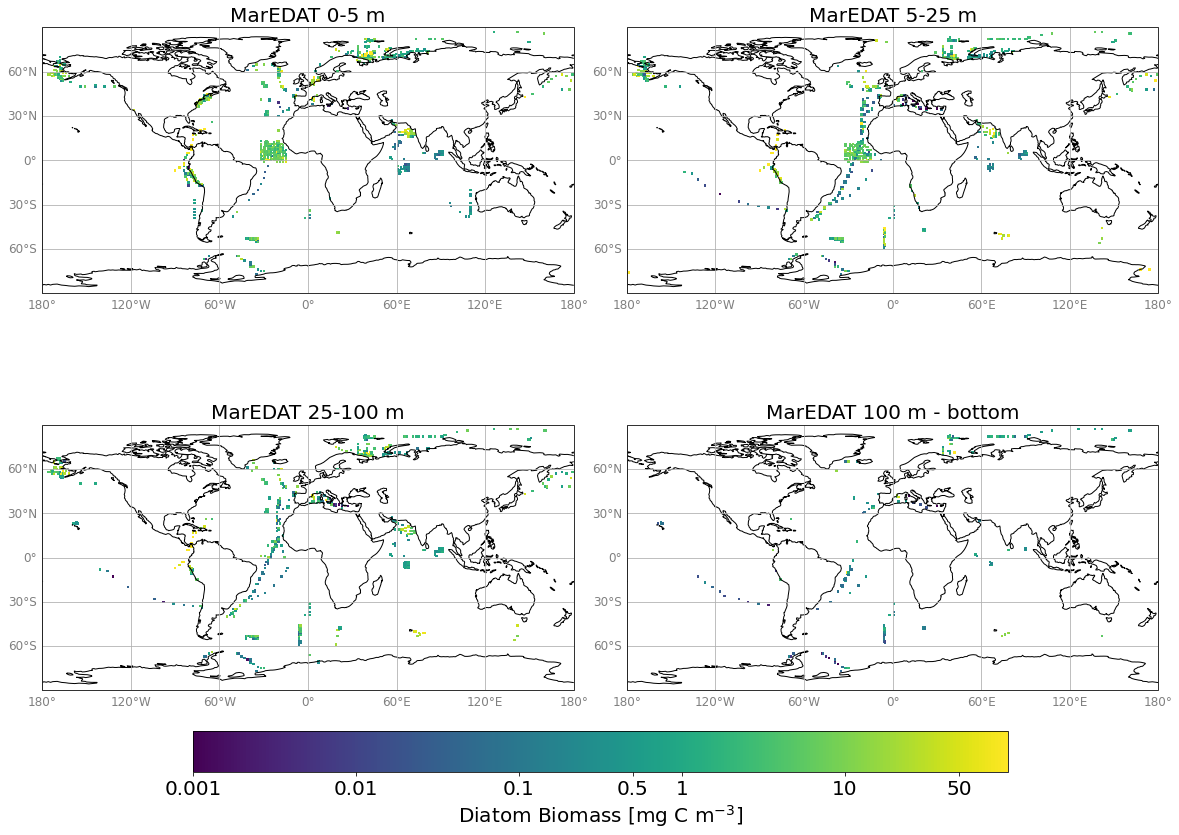

In [9]:
# overview plot: maredat
fig = stx.maredat_overview_plot(maredat_layered,lon_maredat, lat_maredat,mapproj)

# FESOM Diatom carbon

#### - load FESOM data for all specified runs
#### - plot comparison graph for one depth

/work/ollie/mozeisin/results/f2r1.2/mo12
Model depth: 0.0
/work/ollie/mozeisin/results/f2r1.2/mo15
Model depth: 0.0


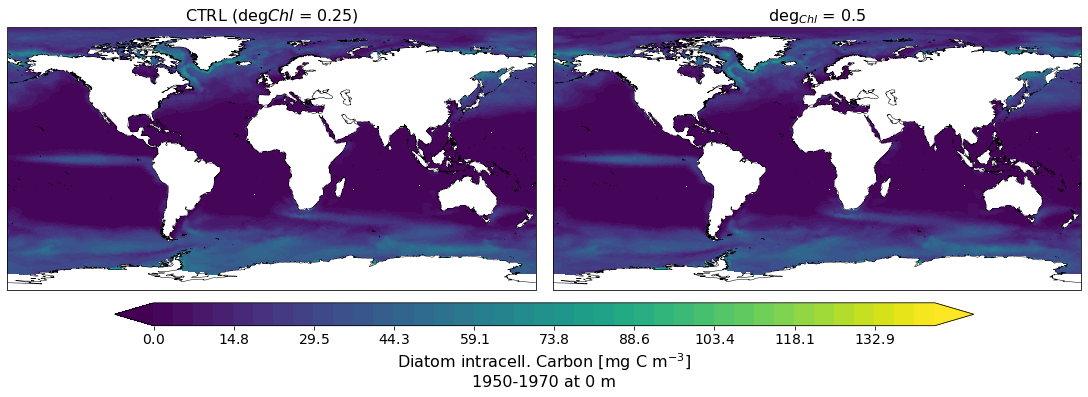

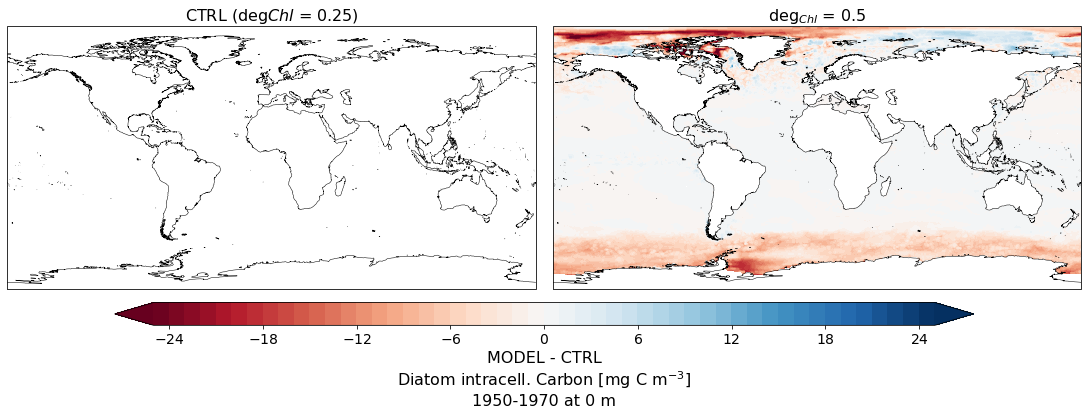

In [11]:
#NCfesom = resultpath[0] + '/DiaC.'+idlist[0]+'.1948.nc' # DiaC:units = "[mmol/m3]"
#!ncdump -h $NCfesom

units = 'Diatom intracell. Carbon [mg C m$^{{-3}}$]\n{0}-{1} at {2} m'.format(years[0],years[1],depth)
#units = 'Intracellular C [mg C m$^{-3}$]'

DiaC = [0]*len(idlist)

for i in range(len(idlist)):
    print(resultpath[i])
    DiaC[i] = pf.get_data(resultpath[i], "DiaC", years, mesh, runid=idlist[i], how="mean", compute=True, depth=depth)
    DiaC[i] = DiaC[i] * 12.01

fig = pf.plot(mesh, [data for data in DiaC], mapproj = mapproj, units=units, cmap = 'viridis',
              rowscol = rowscol, 
              figsize = (15,10),
              titles=[title for title in figlabel])

## differences
fig = pf.plot(mesh, [data-DiaC[0] for data in DiaC], mapproj = mapproj, units='MODEL - CTRL\n'+units, 
              rowscol = rowscol,  
              figsize = (15,10),
              levels = (-25,25, 51), 
              cmap = 'RdBu',
              titles=[title for title in figlabel])

# FESOM comparison to MarEDat

In [12]:
if False:
    print(np.shape(mesh.zlev)) # levels
    print(np.shape(mesh_depths)) # layers

    print(mesh.zlev)
    print(mesh_depths)

#### Interpolating FESOM depth-range-means to 1x1 grid

In [13]:
ctrl = stx.fesom_to_maredat_levels(resultpath[0], idlist[0], years, mesh, lon_maredat, lat_maredat)
mod2 = stx.fesom_to_maredat_levels(resultpath[1], idlist[1], years, mesh, lon_maredat, lat_maredat)
#mod3 = stx.fesom_to_maredat_levels(resultpath[2], idlist[2], years, mesh, lon_maredat, lat_maredat)
#mod4 = stx.fesom_to_maredat_levels(resultpath[3], idlist[3], years, mesh, lon_maredat, lat_maredat)


Processing /work/ollie/mozeisin/results/f2r1.2/mo12 for years 1950-1970
Depth is None, 3d field will be returned

Depth range 0-5 m
with mean 15.4309 min 0.000624 max 150.1687

Depth range 5-25 m
with mean 14.2034 min 0.000629 max 113.0729

Depth range 25-100 m
with mean 9.7660 min 0.000000 max 37.4622

Depth range 100-100000.0 m
with mean 0.6070 min 0.000000 max 5.5438

Processing /work/ollie/mozeisin/results/f2r1.2/mo15 for years 1950-1970
Depth is None, 3d field will be returned

Depth range 0-5 m
with mean 13.3205 min 0.000253 max 142.4770

Depth range 5-25 m
with mean 12.3874 min 0.000257 max 106.5651

Depth range 25-100 m
with mean 8.9944 min 0.000000 max 38.5159

Depth range 100-100000.0 m
with mean 0.5217 min 0.000000 max 4.9628


#### Plot runs

CTRL ($\deg{Chl}$ = 0.25)


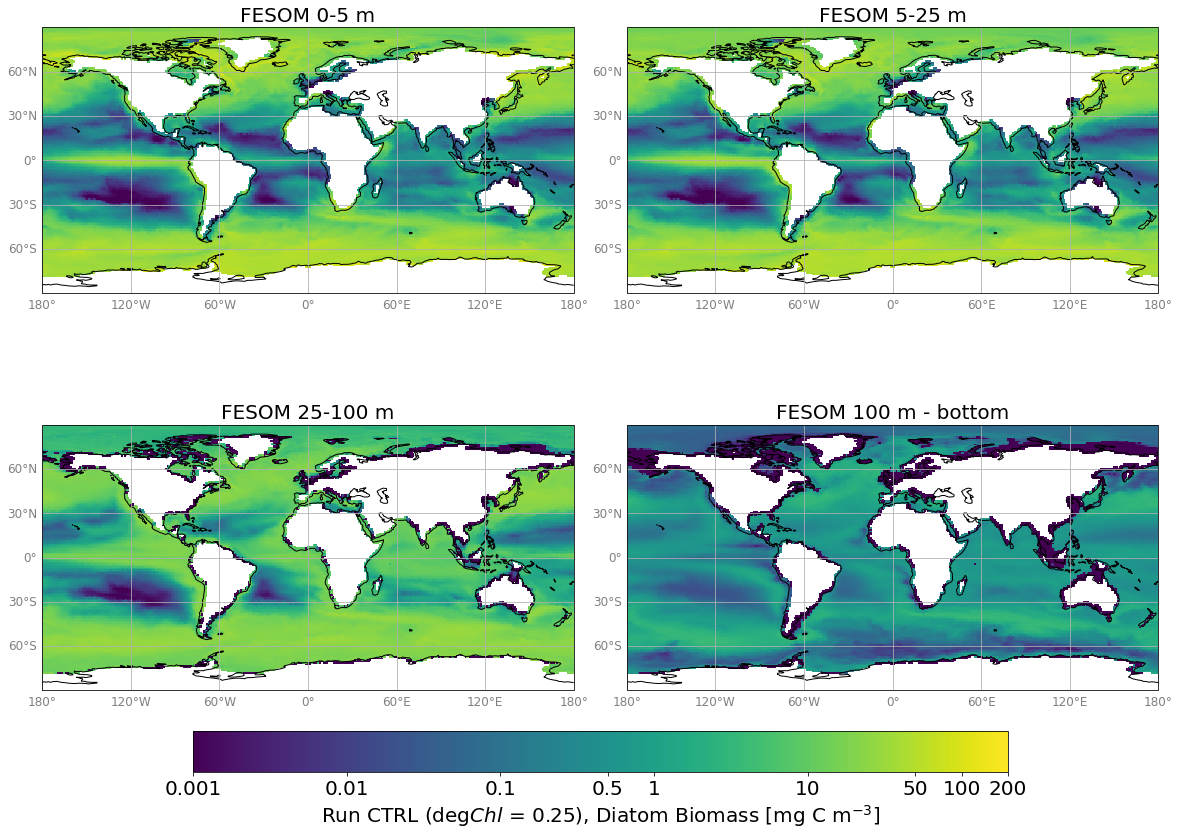

In [14]:
stx.fesom_plot_depths(ctrl, figlabel[0], savelabel[0], lon_maredat, lat_maredat, 
                      mapproj, years, savefig=savefig, savepath=savepath)

$\deg_{Chl}$ = 0.5


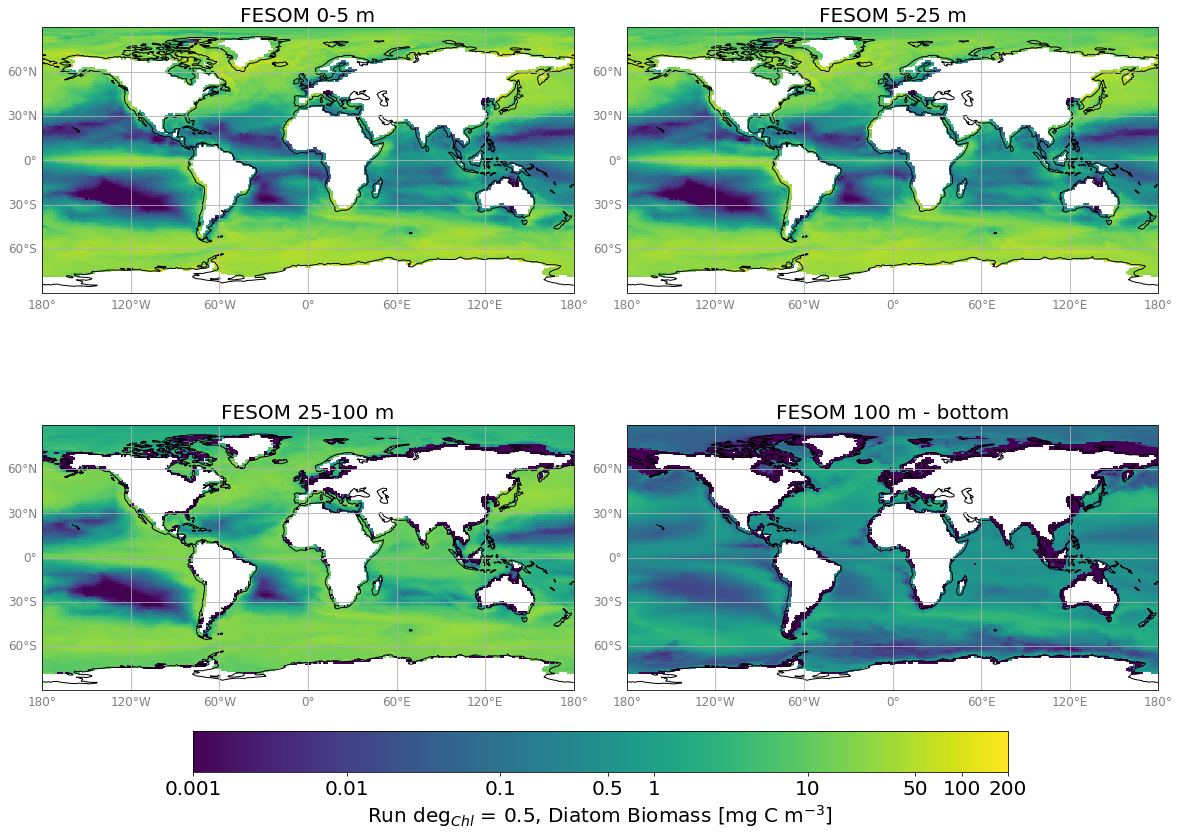

In [15]:
stx.fesom_plot_depths(mod2, figlabel[1], savelabel[1], lon_maredat, lat_maredat, 
                      mapproj, years, savefig=savefig, savepath=savepath)

In [16]:
#stx.fesom_plot_depths(mod3, figlabel[2], savelabel[2], lon_maredat, lat_maredat, mapproj, years, savefig=savefig, savepath=savepath)

In [17]:
#stx.fesom_plot_depths(mod4, figlabel[3], savelabel[3], lon_maredat, lat_maredat, mapproj, years, savefig=savefig, savepath=savepath)

# MarEDAT and FESOM side by side

In [ ]:
stx.plot_2cols(ctrl,figlabel[0],savelabel[0], maredat_layered, lon_maredat, lat_maredat, mapproj, years, savefig, savepath)

In [ ]:
stx.plot_2cols(mod2,figlabel[1],savelabel[1], maredat_layered, lon_maredat, lat_maredat, mapproj, years, savefig, savepath)

In [ ]:
#stx.plot_2cols(mod3,figlabel[2],savelabel[2], maredat_layered, lon_maredat, lat_maredat, mapproj, years, savefig, savepath)

In [ ]:
#stx.plot_2cols(mod4,figlabel[3],savelabel[3], maredat_layered, lon_maredat, lat_maredat, mapproj, years, savefig, savepath)

# Prepare for statistics

### apply mask

In [18]:
# mask model where MarEDAT not available
ctrl_ma = stx.mask_model_with_maredat(ctrl,maredat_layered)
mod2_ma = stx.mask_model_with_maredat(mod2,maredat_layered)
#mod3_ma = stx.mask_model_with_maredat(mod3,maredat_layered)
#mod4_ma = stx.mask_model_with_maredat(mod4,maredat_layered)

#### CONTROL of masking for 0-5 m 


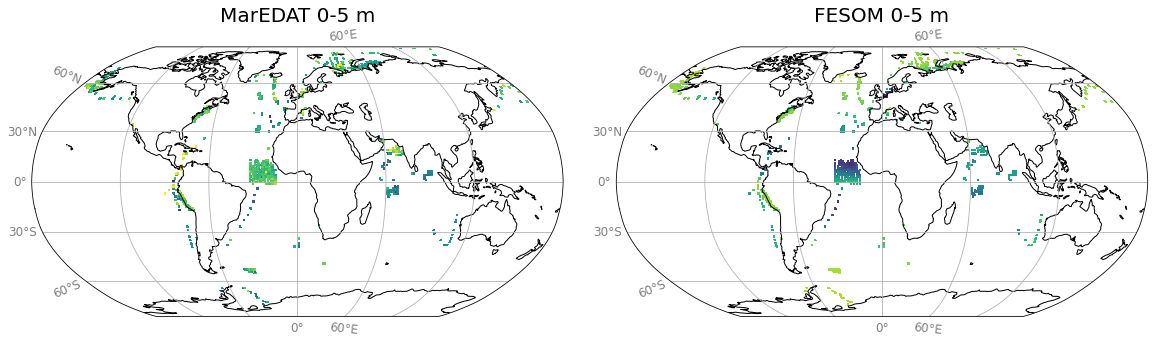

In [19]:
if True:
    fig, axes = plt.subplots(1,2, 
                             subplot_kw=dict(projection=ccrs.Robinson()),
                             gridspec_kw={'hspace': 0.001, 'wspace': 0.1},
                             figsize=(20,20))
    # 0-5 m maredat 
    m1 = axes[0]
    f1 = m1.pcolormesh(lon_maredat, lat_maredat, np.log10(maredat_layered[0]), 
                       transform = ccrs.PlateCarree(),
                        shading='flat', vmin=np.log10(0.001), vmax=np.log10(200), 
                        cmap=plt.cm.viridis)
    stx.mygrid(m1)
    m1.set_title('MarEDAT 0-5 m', fontsize=20)

    # FESOM 
    m1 = axes[1]
    f1 = m1.pcolormesh(lon_maredat, lat_maredat, np.log10(ctrl_ma[0]), 
                       transform = ccrs.PlateCarree(),
                        shading='flat', vmin=np.log10(0.001), vmax=np.log10(200), 
                        cmap=plt.cm.viridis)
    stx.mygrid(m1)
    m1.set_title('FESOM 0-5 m', fontsize=20)

# Taylor statistics

In [20]:
depth_range = [0,5,25,100,'bot']

In [21]:
if False: #old
    fig, sdev, crmsd, ccoef = stx.plot_Taylor(maredat_layered[0],ctrl_ma[0],
                        plot_depth = '0-5m')


Depth range 0-5 m

Original Taylor stats:
SDEV pred: 14.35249, ref: 189.26585
CRMS pred: 189.20288, ref: 0.00000
CORRCOEF: 0.04230

Normalized Taylor stats:
SDEV pred: 0.07583, ref: 1.00000
CRMS pred: 0.99967, ref: 0.00000
CORRCOEF: 0.04230

Depth range 5-25 m

Original Taylor stats:
SDEV pred: 14.18278, ref: 56.10948
CRMS pred: 57.81951, ref: 0.00000
CORRCOEF: 0.00398

Normalized Taylor stats:
SDEV pred: 0.25277, ref: 1.00000
CRMS pred: 1.03048, ref: 0.00000
CORRCOEF: 0.00398

Depth range 25-100 m

Original Taylor stats:
SDEV pred: 7.26962, ref: 45.58821
CRMS pred: 45.63482, ref: 0.00000
CORRCOEF: 0.07332

Normalized Taylor stats:
SDEV pred: 0.15946, ref: 1.00000
CRMS pred: 1.00102, ref: 0.00000
CORRCOEF: 0.07332

Depth range 100-bot m

Original Taylor stats:
SDEV pred: 0.49767, ref: 49.92118
CRMS pred: 49.94073, ref: 0.00000
CORRCOEF: -0.03432

Normalized Taylor stats:
SDEV pred: 0.00997, ref: 1.00000
CRMS pred: 1.00039, ref: 0.00000
CORRCOEF: -0.03432


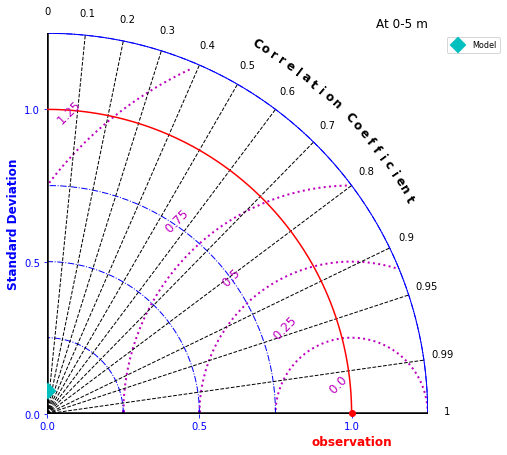

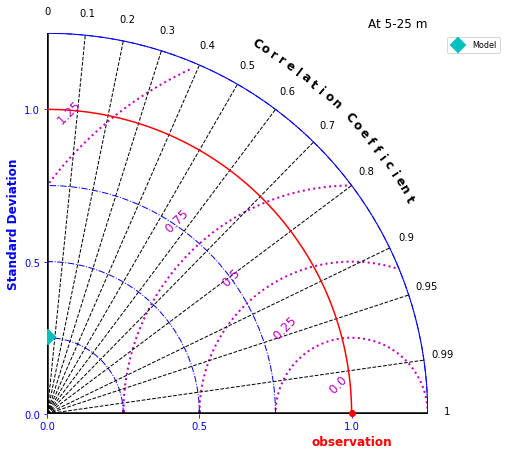

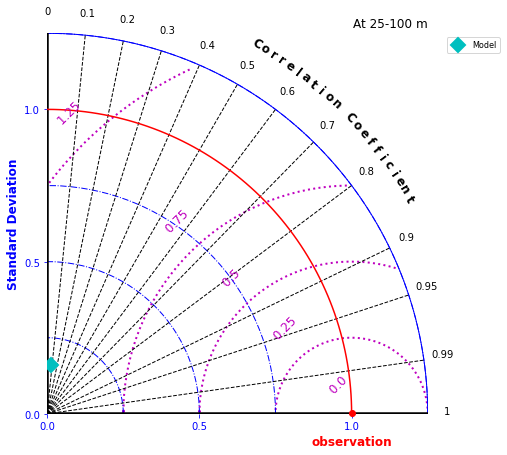

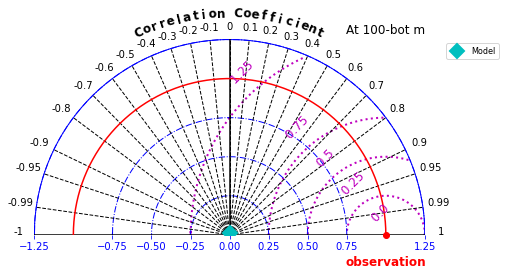

In [22]:
# print all runs at once
fig, sdev, crmsd, ccoef_ctrl = stx.plot_Taylor_all_depths(maredat_layered,ctrl_ma,depth_range)


Depth range 0-5 m

Original Taylor stats:
SDEV pred: 13.07308, ref: 189.26585
CRMS pred: 189.17338, ref: 0.00000
CORRCOEF: 0.04161

Normalized Taylor stats:
SDEV pred: 0.06907, ref: 1.00000
CRMS pred: 0.99951, ref: 0.00000
CORRCOEF: 0.04161

Depth range 5-25 m

Original Taylor stats:
SDEV pred: 12.58553, ref: 56.10948
CRMS pred: 57.53742, ref: 0.00000
CORRCOEF: -0.00275

Normalized Taylor stats:
SDEV pred: 0.22430, ref: 1.00000
CRMS pred: 1.02545, ref: 0.00000
CORRCOEF: -0.00275

Depth range 25-100 m

Original Taylor stats:
SDEV pred: 6.73833, ref: 45.58821
CRMS pred: 45.49066, ref: 0.00000
CORRCOEF: 0.08837

Normalized Taylor stats:
SDEV pred: 0.14781, ref: 1.00000
CRMS pred: 0.99786, ref: 0.00000
CORRCOEF: 0.08837

Depth range 100-bot m

Original Taylor stats:
SDEV pred: 0.42943, ref: 49.92118
CRMS pred: 49.94088, ref: 0.00000
CORRCOEF: -0.04158

Normalized Taylor stats:
SDEV pred: 0.00860, ref: 1.00000
CRMS pred: 1.00039, ref: 0.00000
CORRCOEF: -0.04158


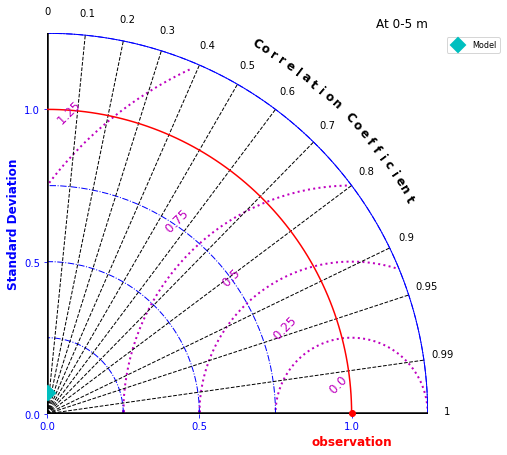

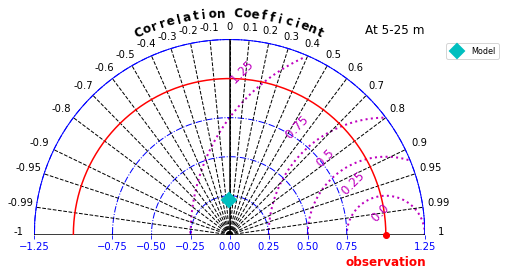

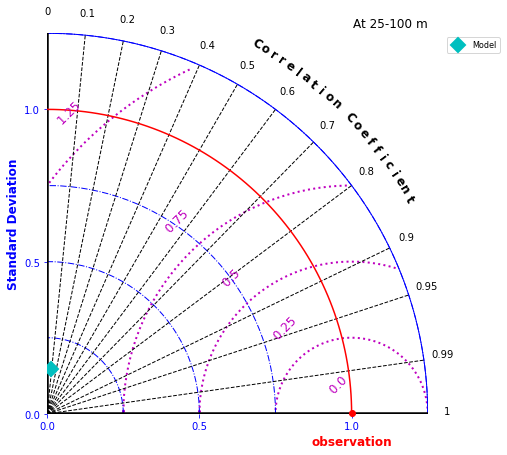

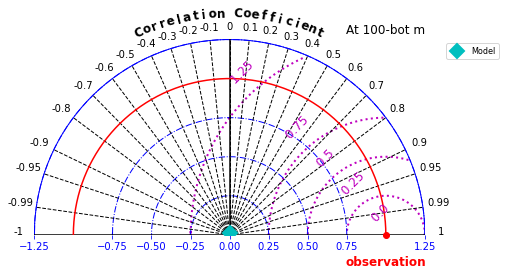

In [23]:
fig, sdev, crmsd, ccoef_mod2 = stx.plot_Taylor_all_depths(maredat_layered,mod2_ma,depth_range)

In [ ]:
#fig, sdev, crmsd, ccoef_mod3 = stx.plot_Taylor_all_depths(maredat_layered,mod3_ma,depth_range)

In [ ]:
#fig, sdev, crmsd, ccoef_mod4 = stx.plot_Taylor_all_depths(maredat_layered,mod4_ma,depth_range)

# Scatter plots (as Miriam)

CTRL ($\deg{Chl}$ = 0.25)


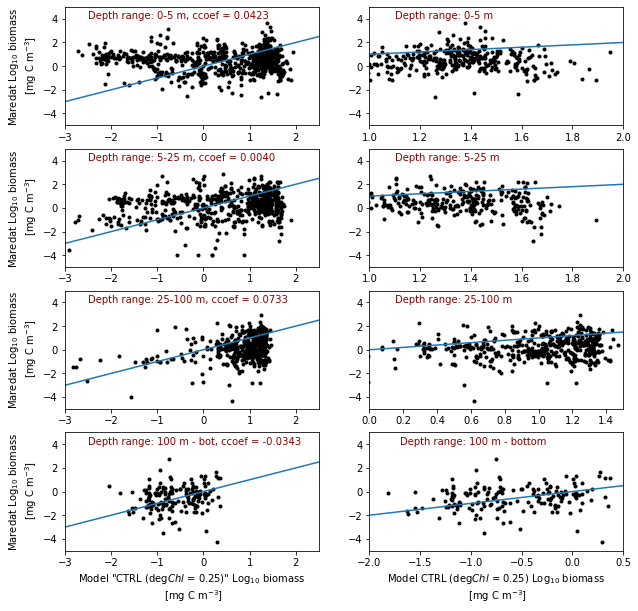

In [25]:
stx.plot_scatter(ctrl_ma, figlabel[0], savelabel[0], maredat_layered, years, savefig, savepath, ccoef_ctrl)

$\deg_{Chl}$ = 0.5


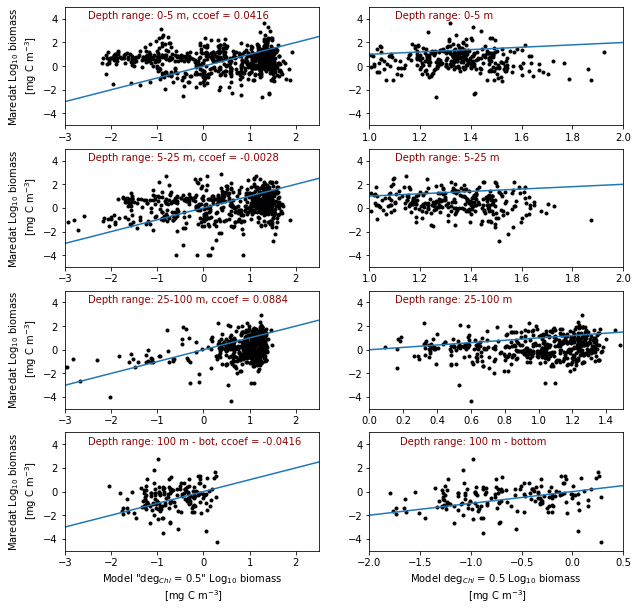

In [24]:
stx.plot_scatter(mod2_ma, figlabel[1], savelabel[1], maredat_layered, years, savefig, savepath, ccoef_mod2)


In [ ]:
#stx.plot_scatter(mod3_ma, figlabel[2], savelabel[2], maredat_layered, years, savefig, savepath, ccoef_mod3)


In [ ]:
#stx.plot_scatter(mod4_ma, figlabel[3], savelabel[3], maredat_layered, years, savefig, savepath, ccoef_mod4)


# OCCCI comparison

In [42]:
!jupyter nbconvert --to=python Chlsurf_OCCCI_Comparison_python3.ipynb
from Chlsurf_OCCCI_Comparison_python3 import Chlsurf_OCCCI_comp

########################################################
# check OCCCI documentation on depth range of data!
# http://www.esa-oceancolour-cci.org/
########################################################

[NbConvertApp] Converting notebook Chlsurf_OCCCI_Comparison_python3.ipynb to python
[NbConvertApp] Writing 12073 bytes to Chlsurf_OCCCI_Comparison_python3.py



****************************** 
ANALYSING /work/ollie/mozeisin/results/f2r1.2/mo12 
******************************
Using upper 1 layers to depth -5.0 m for surface FESOM data!

Plotting log10(Chl.a)
OCCCI min = -2.0880, max = 1.7277
FESOM min = -1.9352, max = 3.0493 (Mean over 0 to -5.0 m)


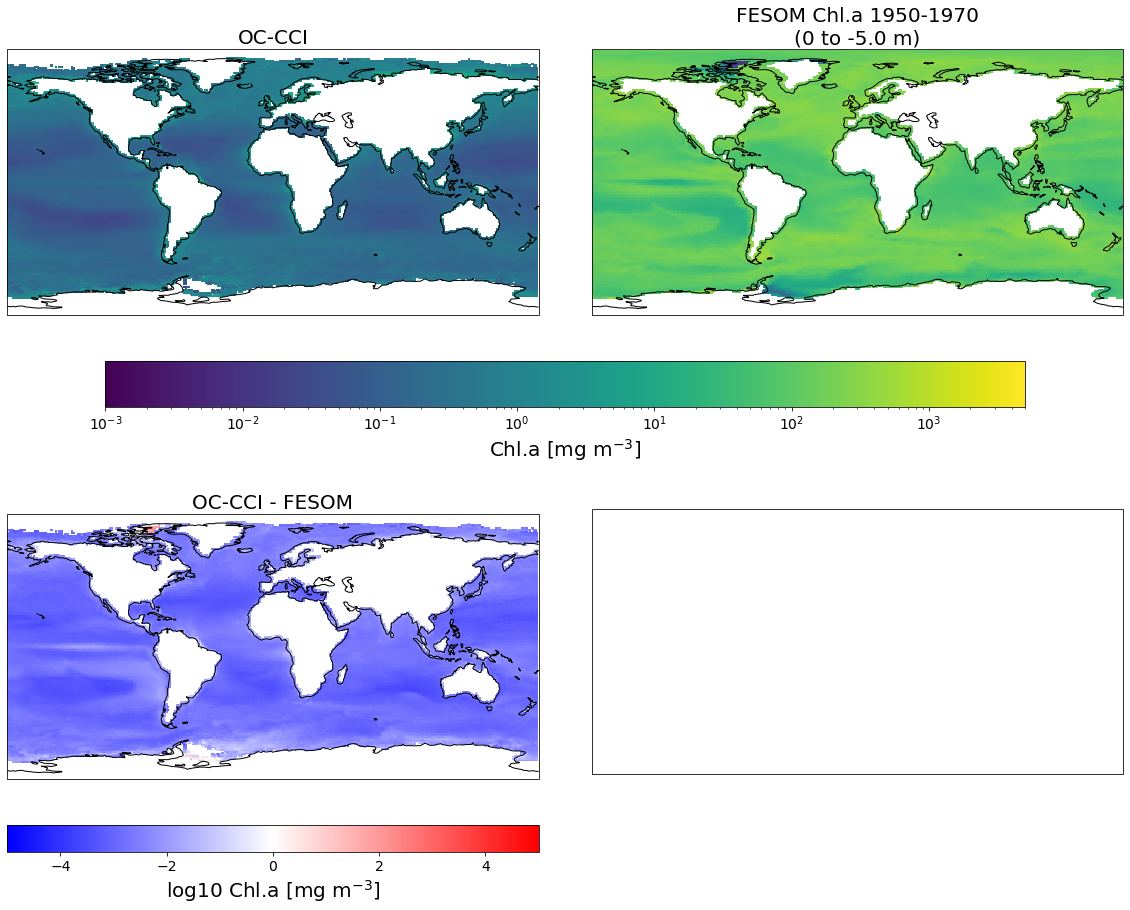


Statistics for log10 surface Chlorophyll

Original Taylor stats:
SDEV pred: 0.33387, ref: 0.44571
CRMS pred: 0.47627, ref: 0.00000
CORRCOEF: 0.27987

Normalized Taylor stats:
SDEV pred: 0.74908, ref: 1.00000
CRMS pred: 1.06857, ref: 0.00000
CORRCOEF: 0.27987


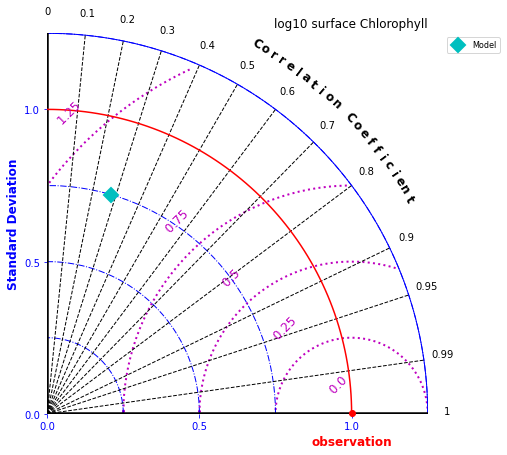


****************************** 
ANALYSING /work/ollie/mozeisin/results/f2r1.2/mo15 
******************************
Using upper 1 layers to depth -5.0 m for surface FESOM data!

Plotting log10(Chl.a)
OCCCI min = -2.0880, max = 1.7277
FESOM min = -2.0489, max = 2.9787 (Mean over 0 to -5.0 m)


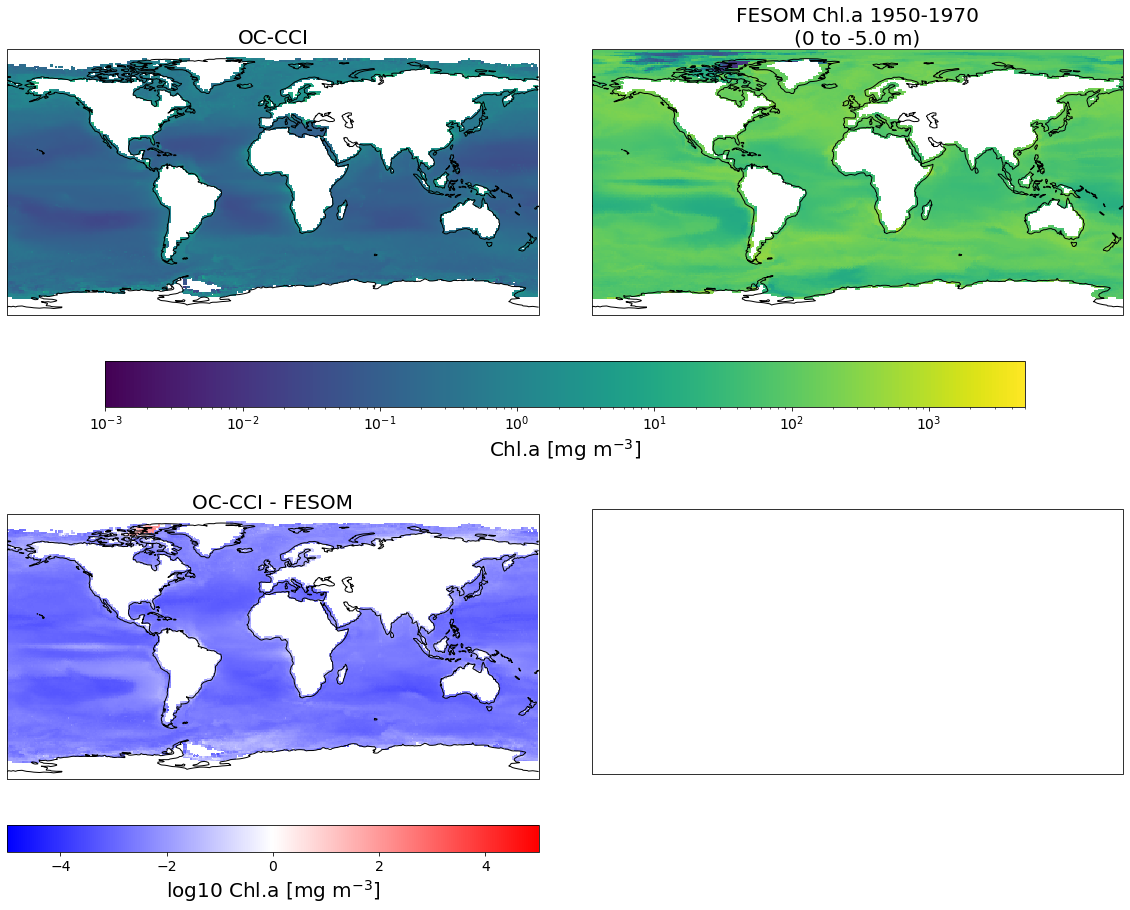


Statistics for log10 surface Chlorophyll

Original Taylor stats:
SDEV pred: 0.32449, ref: 0.44571
CRMS pred: 0.47886, ref: 0.00000
CORRCOEF: 0.25806

Normalized Taylor stats:
SDEV pred: 0.72803, ref: 1.00000
CRMS pred: 1.07437, ref: 0.00000
CORRCOEF: 0.25806


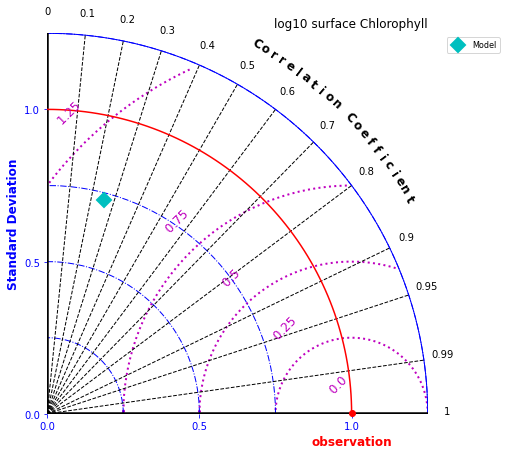

In [44]:
# run Chlsurf_OCCCI_comp for each result
if True:
    for i in range(len(resultpath)):
        print('\n****************************** \nANALYSING {0} \n******************************'.format(resultpath[i]))
        fig = Chlsurf_OCCCI_comp(idlist[i],resultpath[i],savepath,meshpath,matfileChlsurf,first_year,last_year,
                          mapproj=mapproj,savefig=savefig)

# Diatom silicate

Model depth: 0.0
Model depth: 0.0


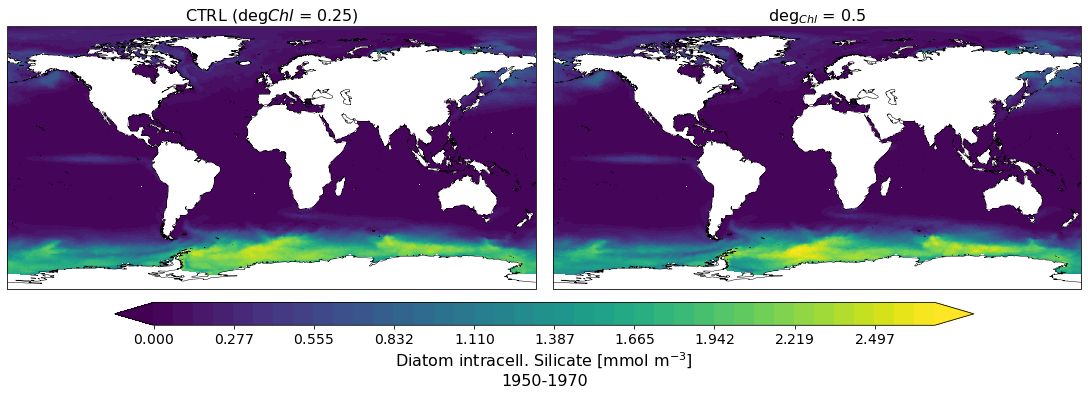

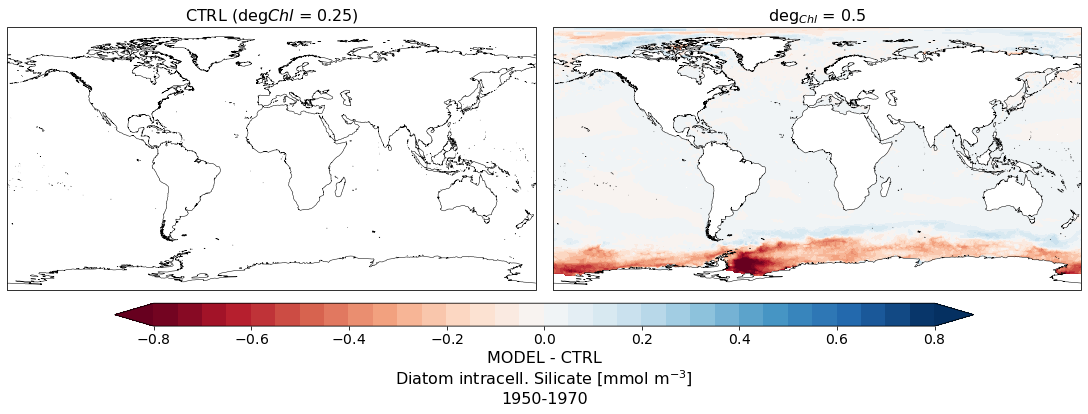

In [26]:
units = 'Diatom intracell. Silicate [mmol m$^{{-3}}$]\n{0}-{1}'.format(years[0],years[1])
#units = 'intracellular Si [mmol m$^{-3}$]'

DiaSi = [0]*len(idlist)

for i in range(len(idlist)):
    DiaSi[i] = pf.get_data(resultpath[i], "DiaSi", years, mesh, runid=idlist[i], how="mean", compute=True, depth=depth)

fig = pf.plot(mesh, [data for data in DiaSi], mapproj = mapproj, units=units, cmap = 'viridis',
              rowscol = rowscol,
              figsize = (15,10),
              titles=[title for title in figlabel])

## differences
fig = pf.plot(mesh, [data-DiaSi[0] for data in DiaSi], mapproj = mapproj, units='MODEL - CTRL\n'+units, 
              rowscol = rowscol,
              figsize = (15,10),
              levels = (-.8,.8, 33), 
              cmap = 'RdBu',
              titles=[title for title in figlabel])

# Chl a

In [27]:
# diatom chlorophyll
NCfesom = resultpath[0] + '/DiaChl.fesom.1948.nc'
!ncdump -h $NCfesom

netcdf DiaChl.fesom.1948 {
dimensions:
	nz1 = 47 ;
	nod2 = 126858 ;
	time = UNLIMITED ; // (12 currently)
variables:
	double time(time) ;
		time:long_name = "time" ;
		time:units = "seconds since 1948-01-01 0:0:0" ;
	float DiaChl(time, nod2, nz1) ;
		DiaChl:description = "DiaChl" ;
		DiaChl:units = "[mmol/m3]" ;
}


Model depth: 0.0
Model depth: 0.0


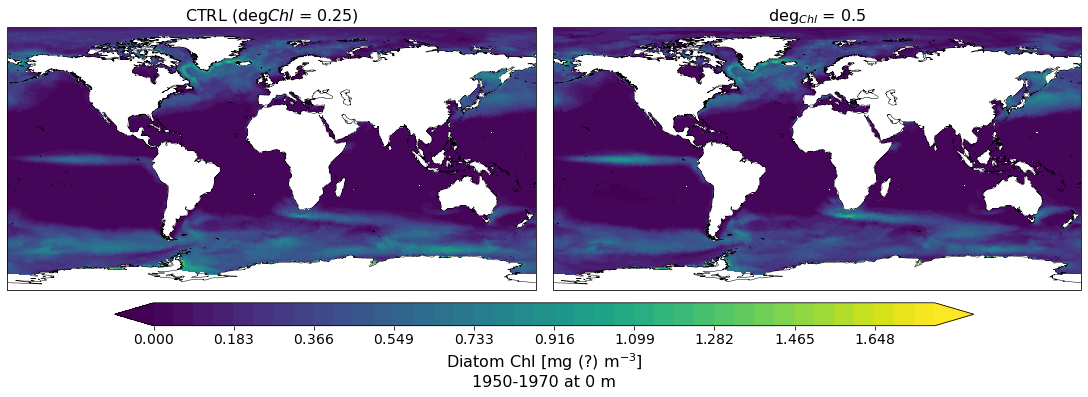

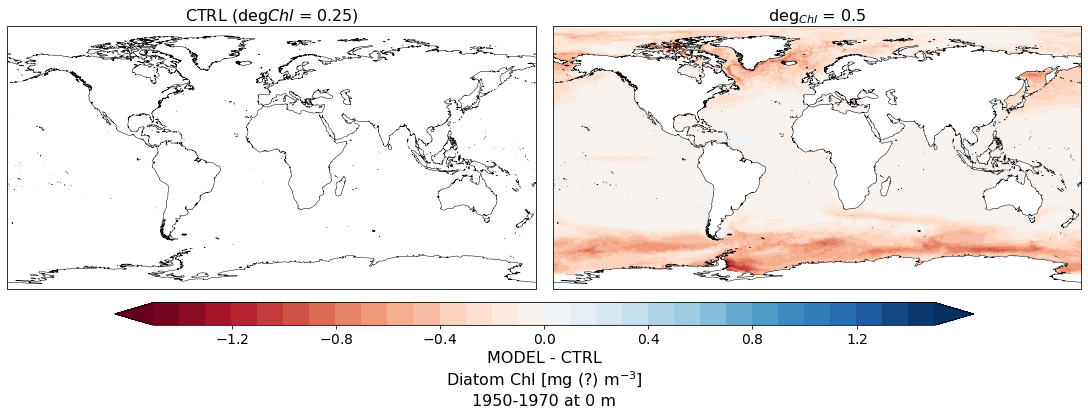

In [36]:
depth = 0

DiaChl = [0]*len(idlist)

units ='Diatom Chl [mg (?) m$^{{-3}}$]\n{0}-{1} at {2} m'.format(years[0],years[1],depth)
#units = 'Chl.a [mmol m$^{-3}$]'

for i in range(len(idlist)):
    DiaChl[i] = pf.get_data(resultpath[i], "DiaChl", years, mesh, runid=idlist[i], how="mean", 
                            compute=True, depth=depth)

fig = pf.plot(mesh, [data for data in DiaChl], mapproj = mapproj, units=units, cmap = 'viridis',
              rowscol = rowscol, #(math.ceil(len(idlist)/3), 3), 
              figsize = (15,10),
              titles=[title for title in figlabel])

fig = pf.plot(mesh, [data-DiaChl[0] for data in DiaChl], mapproj = mapproj, units='MODEL - CTRL\n'+units, 
              rowscol = rowscol, #(math.ceil(len(idlist)/3), 3), 
              figsize = (15,10),
              levels = (-1.5,1.5, 31), 
              cmap = 'RdBu',
              titles=[title for title in figlabel])

# Map of total Diatom NPP 

Model depth: 0.0
Model depth: 0.0


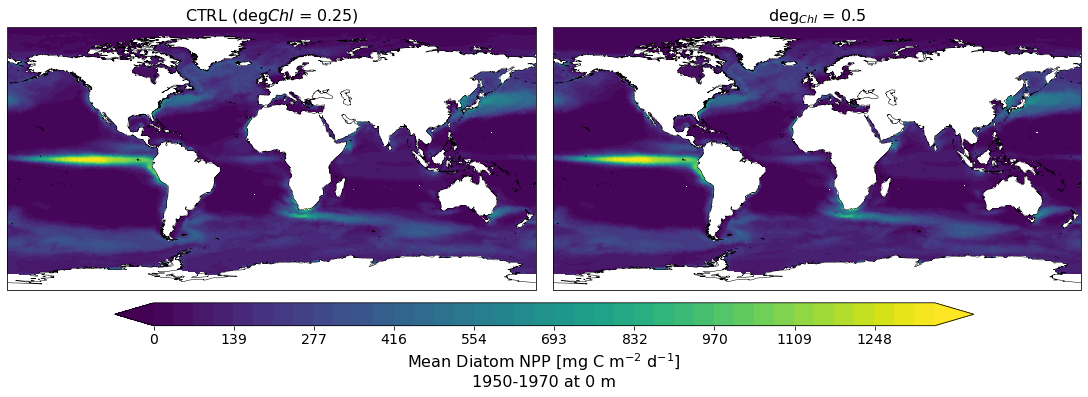

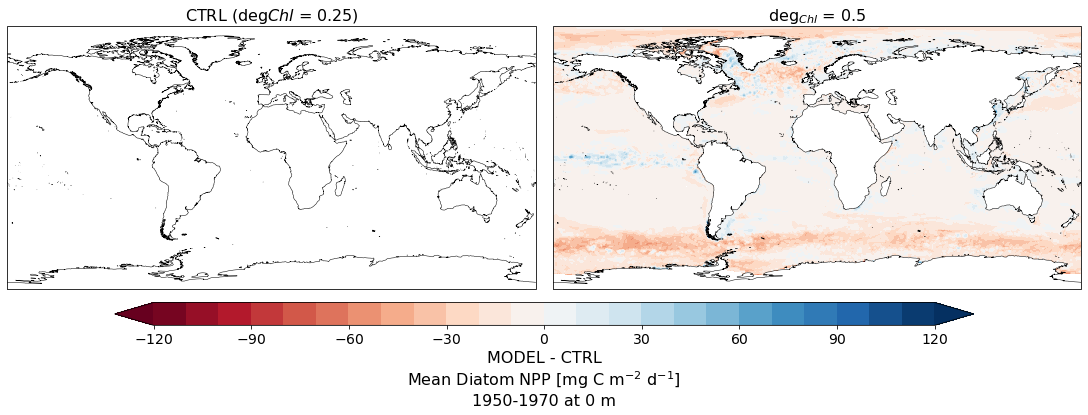

In [38]:
#NCfesom = resultpath + '/NPPd.fesom.1948.nc'
#!ncdump -h $NCfesom

depth = 0

# 12.01* data --> mg C/m2/d

units ='Mean Diatom NPP [mg C m$^{{-2}}$ d$^{{-1}}$]\n{0}-{1} at {2} m'.format(years[0],years[1],depth)
#units = 'Mean NPP [mg C m$^{-2}$ d$^{-1}$]'

NPPd = [0]*len(idlist)

for i in range(len(idlist)):
    NPPd[i] = pf.get_data(resultpath[i], "NPPd", years, mesh, runid=idlist[i], how="mean", compute=True, depth=depth)
    NPPd[i] = NPPd[i] * 12.01

fig = pf.plot(mesh, [data for data in NPPd], mapproj = mapproj, units=units, cmap = 'viridis',
              rowscol = rowscol, #(math.ceil(len(idlist)/3), 3), 
              figsize = (15,10),
              titles=[title for title in figlabel])

## differences
fig = pf.plot(mesh, [data-NPPd[0] for data in NPPd], mapproj = mapproj, units='MODEL - CTRL\n'+units, 
              rowscol = rowscol, #(math.ceil(len(idlist)/3), 3), 
              figsize = (15,10),
              levels = (-120,120, 25), 
              cmap = 'RdBu',
              titles=[title for title in figlabel])

# Map of nanophytoplankton NPP

Model depth: 0.0
Model depth: 0.0


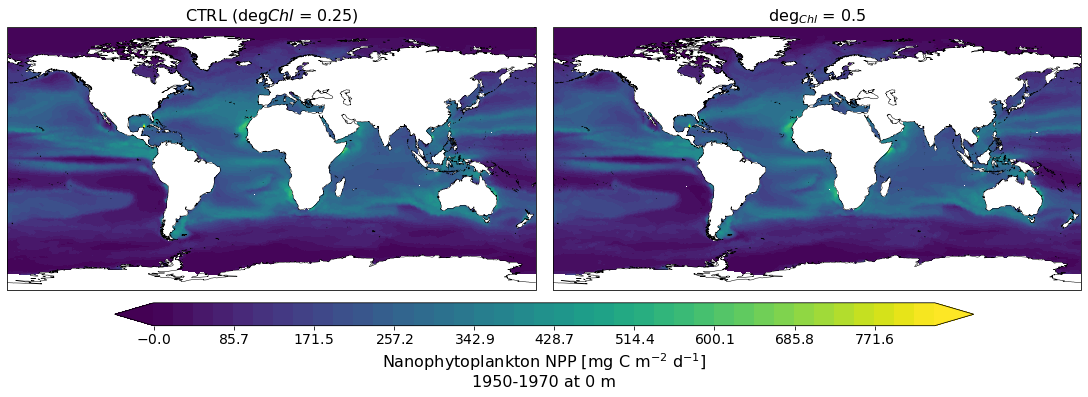

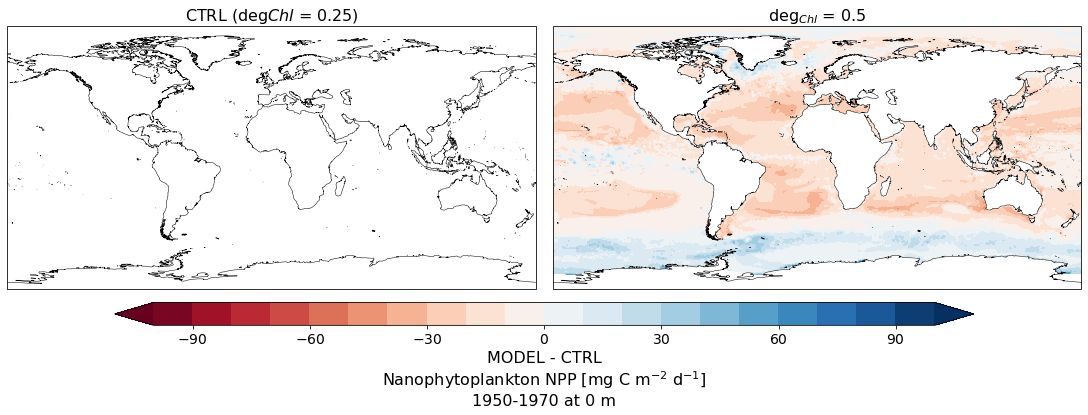

In [40]:
#NCfesom = resultpath + '/NPPn.mo1.1948.nc'
#!ncdump -h $NCfesom

# 12.01* data --> mg C/m2/d

units = 'Nanophytoplankton NPP [mg C m$^{{-2}}$ d$^{{-1}}$]\n{0}-{1} at {2} m'.format(years[0],years[1],depth)
#units = 'Mean NPP [mg C m$^{-2}$ d$^{-1}$]'

NPPn = [0]*len(idlist)

for i in range(len(idlist)):
    NPPn[i] = pf.get_data(resultpath[i], "NPPn", years, mesh, runid=idlist[i], how="mean", compute=True, depth=depth)
    NPPn[i] = NPPn[i] * 12.01

fig = pf.plot(mesh, [data for data in NPPn], mapproj = mapproj, units=units, cmap = 'viridis',
              rowscol = rowscol, #(math.ceil(len(idlist)/3), 3), 
              figsize = (15,10),
              titles=[title for title in figlabel])

## differences
fig = pf.plot(mesh, [data-NPPn[0] for data in NPPn], mapproj = mapproj, units='MODEL - CTRL\n'+units, 
              rowscol = rowscol, #(math.ceil(len(idlist)/3), 3), 
              figsize = (15,10),
              levels = (-100,100, 21), 
              cmap = 'RdBu',
              titles=[title for title in figlabel])

# Total NPP

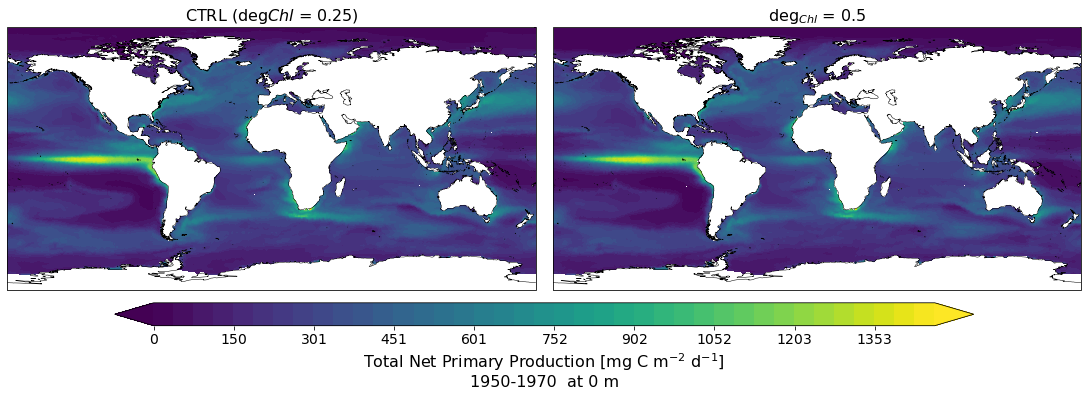

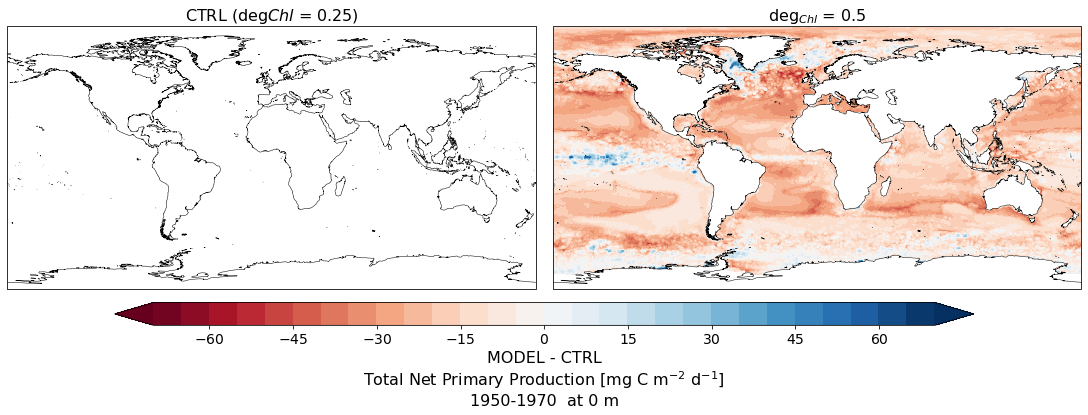

In [41]:
units ='Total Net Primary Production [mg C m$^{{-2}}$ d$^{{-1}}$]\n{0}-{1}  at {2} m'.format(years[0],years[1],depth)
#units = 'Mean total NPP [mg C m$^{-2}$ d$^{-1}$]'

NPPtot = [NPPd[i] + NPPn[i] for i in range(len(idlist))]

fig = pf.plot(mesh, [data for data in NPPtot], mapproj = mapproj, units=units, cmap = 'viridis',
              rowscol = rowscol, #(math.ceil(len(idlist)/3), 3), 
              figsize = (15,10),
              titles=[title for title in figlabel])

## differences
fig = pf.plot(mesh, [data-NPPtot[0] for data in NPPtot], mapproj = mapproj, units='MODEL - CTRL\n'+units, 
              rowscol = rowscol, #(math.ceil(len(idlist)/3), 3), 
              figsize = (15,10),
              levels = (-70,70, 29), 
              cmap = 'RdBu',
              titles=[title for title in figlabel])

# Nutrients

In [33]:
!jupyter nbconvert --to=python DIN_WOA_Comparison_python3.ipynb
from DIN_WOA_Comparison_python3 import DINcomp

[NbConvertApp] Converting notebook DIN_WOA_Comparison_python3.ipynb to python
[NbConvertApp] Writing 12520 bytes to DIN_WOA_Comparison_python3.py


In [34]:
# check DIN comp to WOA FOR CONTROL RUN

#ctrl = DINcomp('fesom',resultpath[0],savepath,meshpath,ncfileDIN,first_year,last_year,mapproj=mapproj)

#### compare each FESOM run with WOA DIN


****************************** 
ANALYSING /work/ollie/mozeisin/results/f2r1.2/mo12 
******************************
***
Loading WOA file: /work/ollie/projects/MarESys/evaluation/woa13_all_n00_01.nc
***
***
Depth greater in FESOM (-6125.0) than in WOA (-5500.0)
Please consider choosing max depth level 43 with max depth at -5275.0!
***

Plotting DIN as mean over depth
FESOM min = 0.00502232788130641, max = 34.28483581542969
WOA min = 0.0005629408827170412, max = 34.985260415584484


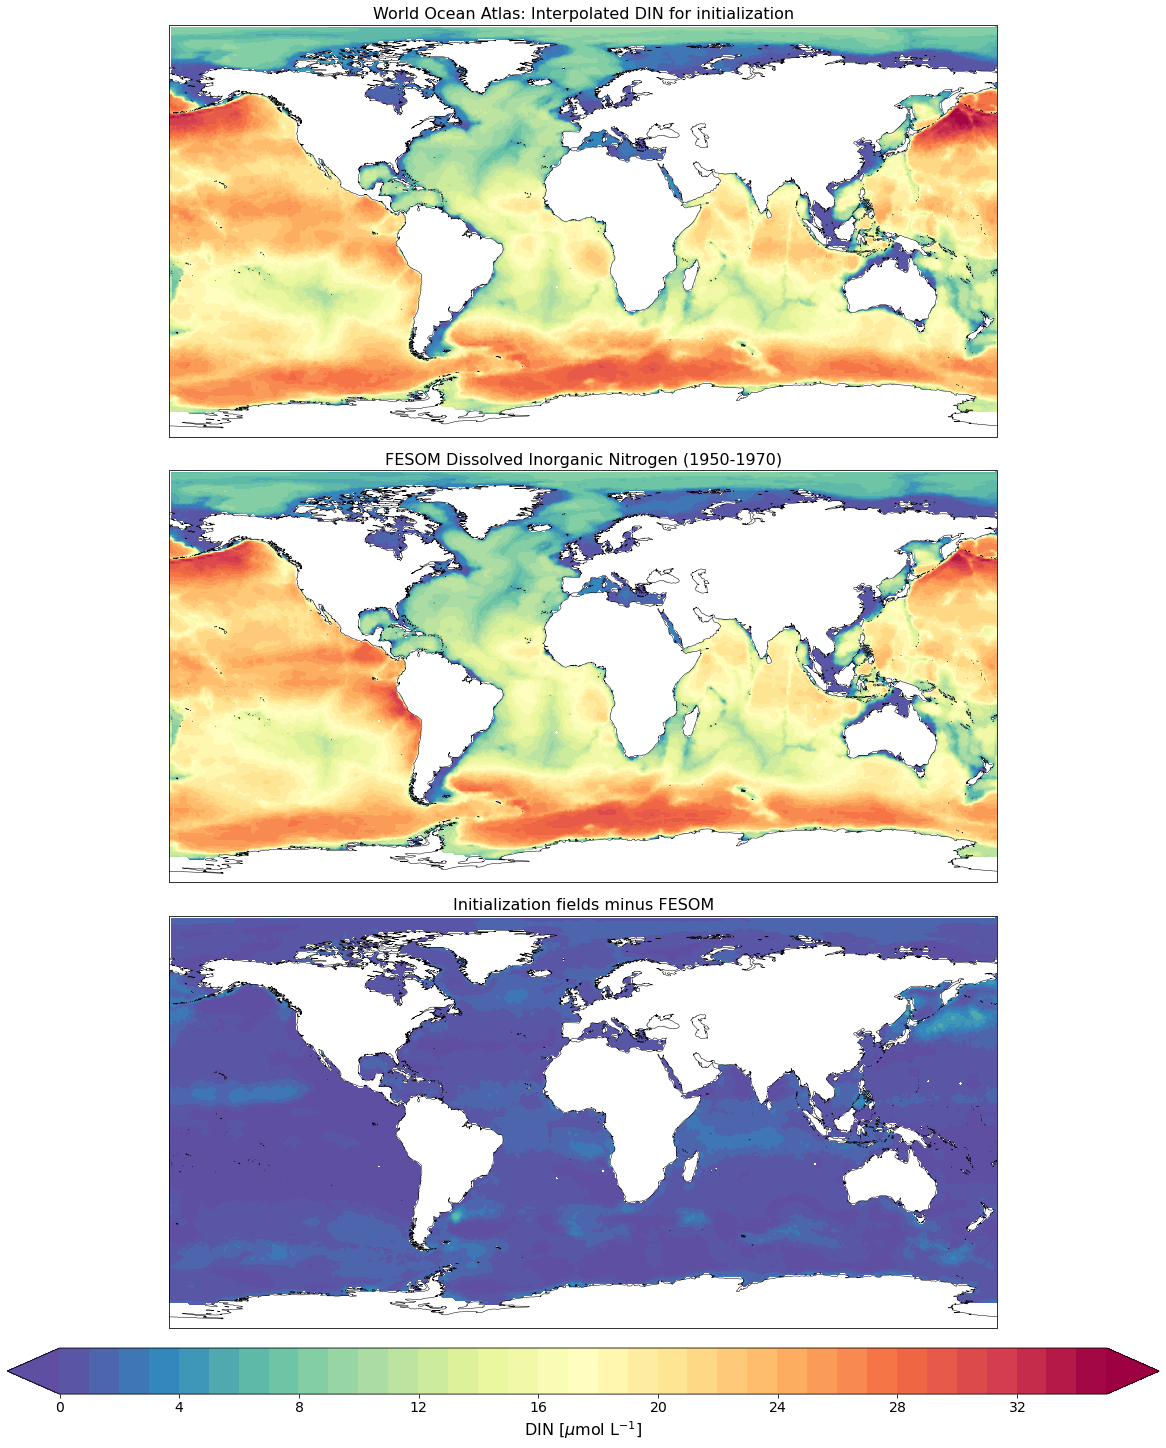


Original Taylor stats:
SDEV pred: 9.42967, ref: 9.27727
CRMS pred: 1.10794, ref: 0.00000
CORRCOEF: 0.99312

Normalized Taylor stats:
SDEV pred: 1.01643, ref: 1.00000
CRMS pred: 0.11943, ref: 0.00000
CORRCOEF: 0.99312


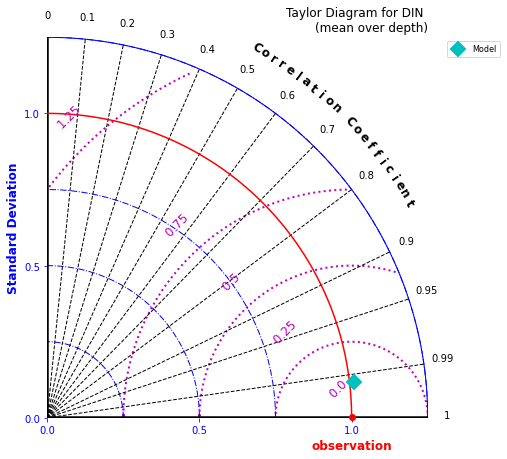


****************************** 
ANALYSING /work/ollie/mozeisin/results/f2r1.2/mo15 
******************************
***
Loading WOA file: /work/ollie/projects/MarESys/evaluation/woa13_all_n00_01.nc
***
***
Depth greater in FESOM (-6125.0) than in WOA (-5500.0)
Please consider choosing max depth level 43 with max depth at -5275.0!
***

Plotting DIN as mean over depth
FESOM min = 0.0036510825157165527, max = 34.30888748168945
WOA min = 0.0005629408827170412, max = 34.985260415584484


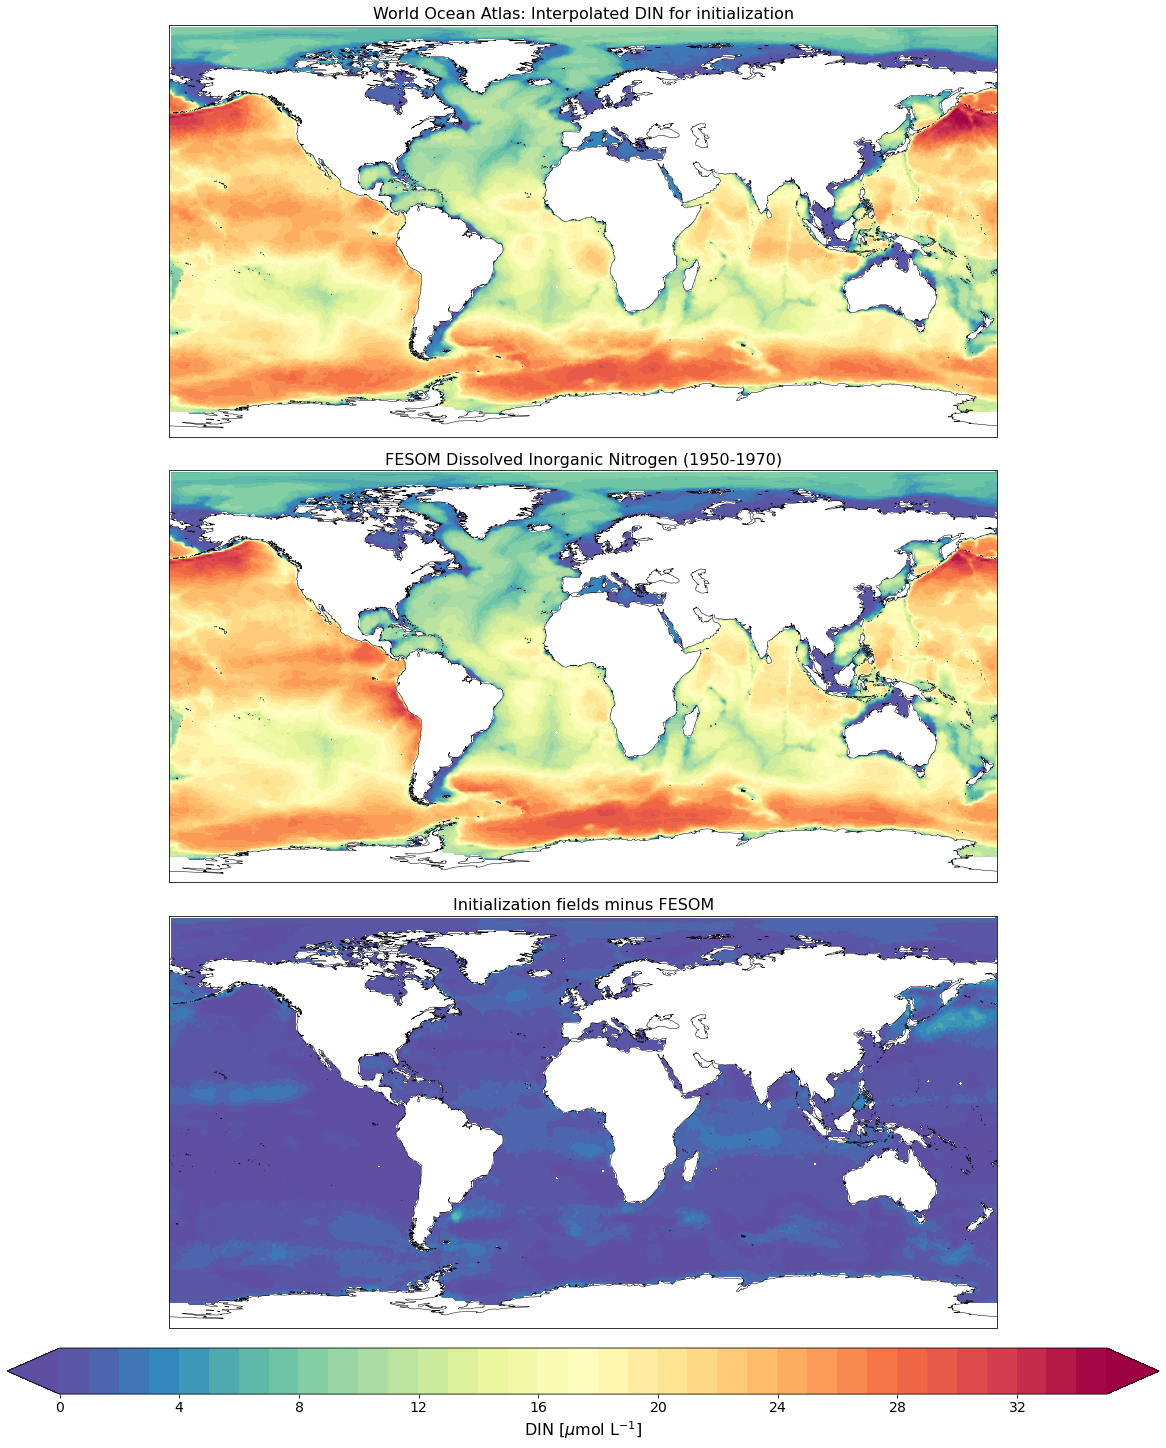


Original Taylor stats:
SDEV pred: 9.42265, ref: 9.27727
CRMS pred: 1.10376, ref: 0.00000
CORRCOEF: 0.99315

Normalized Taylor stats:
SDEV pred: 1.01567, ref: 1.00000
CRMS pred: 0.11897, ref: 0.00000
CORRCOEF: 0.99315


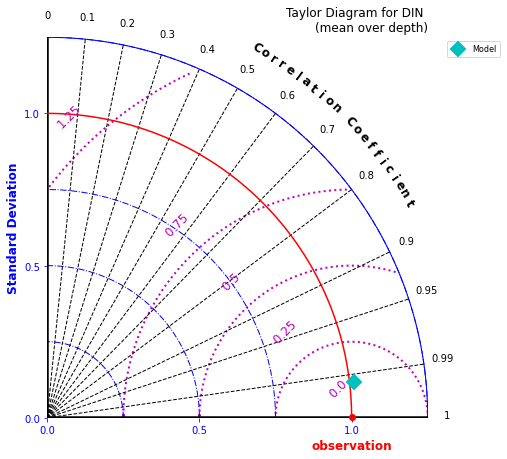

In [45]:
# run DINcomp for each result
if True:
    for i in range(len(resultpath)):
        print('\n****************************** \nANALYSING {0} \n******************************'.format(resultpath[i]))
        fig = DINcomp(idlist[i],resultpath[i],savepath,meshpath,ncfileDIN,first_year,last_year,mapproj=mapproj)

## Transect

#### Atlantic :  Diatom Chl

<GeoAxesSubplot:>

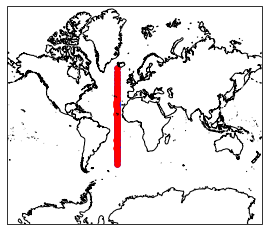

In [46]:
lon_start = -25
lat_start = -50
lon_end = -25
lat_end = 65
npoints   = 50
lonlat = pf.transect_get_lonlat(lon_start, lat_start, lon_end, lat_end, npoints)

pf.plot_transect_map(lonlat, mesh)

#### load FESOM 3d DiaC data

In [47]:
#load 3D data
DiaC_3d = [0]*len(idlist)

for i in range(len(idlist)):
    print(resultpath[i])
    DiaC_3d_aux = pf.get_data(resultpath[i], "DiaC", years, mesh, runid=idlist[i], how="mean")
    DiaC_3d[i] = DiaC_3d_aux * 12.01


/work/ollie/mozeisin/results/f2r1.2/mo12
Depth is None, 3d field will be returned
/work/ollie/mozeisin/results/f2r1.2/mo15
Depth is None, 3d field will be returned


Atlantic Transect, mean of 1950-1970


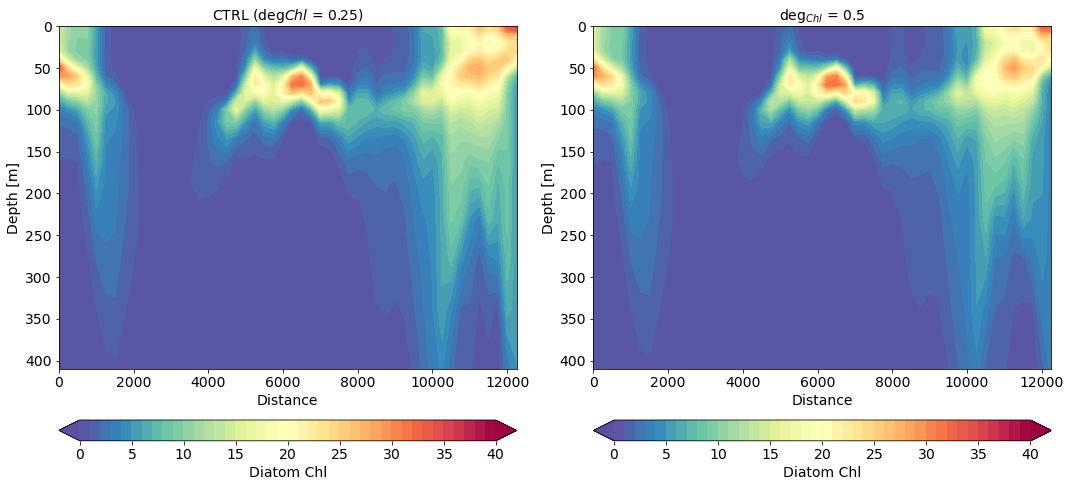

In [55]:
print('Atlantic Transect, mean of {0}-{1}'.format(years[0],years[1]))

dist, transect_data = pf.get_transect(DiaC_3d[0],mesh,lonlat)
dist2, transect_data2 = pf.get_transect(DiaC_3d[1],mesh,lonlat)
#dist3, transect_data3 = pf.get_transect(DiaC_3d[2],mesh,lonlat)
#dist4, transect_data4 = pf.get_transect(DiaC_3d[3],mesh,lonlat)


pf.plot_xyz(mesh, 
            [transect_data,transect_data2],#,transect_data4],
            dist,
            maxdepth=500,
            ncols=2,
            xlabel='Distance',
            label='Diatom Chl',
            title=[l for l in figlabel],
            levels=np.linspace(0,40,41),#cmap=cm.hot_r,
            figsize=(15, 7))


# Other evaluation

## Bracher et al. (2019) PS106


In [ ]:
if False:
    # import from PANGAEA
    ds= pd.PanDataSet(899284)
    print(ds.title)
    # Chl a in µg/L

    PS106 = ds.data

    #print(np.shape(PS106), type(PS106))

    if False: # first overview plot
        fig_PS106 = PS106.plot(kind='scatter', x='Longitude', y='Latitude',
              c='Chl a diatoms', cmap=plt.get_cmap("jet"), colorbar=True,
              figsize = (10,7))

    #### plot with cartopy

    # defining projections
    og = ccrs.Orthographic(0,90)
    pc = ccrs.PlateCarree()

    PS106_Chla_dia = PS106['Chl a diatoms']
    lat, lon = PS106['Latitude'], PS106['Longitude']

    fig = plt.figure(figsize=(20, 16))
    ax = plt.axes(projection=og)
    ax.coastlines()
    ax.gridlines()
    plt.scatter(lon, lat, transform = pc, 
        c=PS106_Chla_dia, cmap=plt.get_cmap("jet"))
    ax.set_extent([-20, 50, 60, 90])
    ax.stock_img()
    plt.xlabel('longitude')
    plt.ylabel('latitude')
    plt.title('PS106 Diatom Chlorophyll a  (Bracher et al., 2019)')
    plt.colorbar(label='Diatom Chl.a [µg/L]')
    #plt.clim(0, 10)

## Evaluation scripts from pyfesom 2

#### Diatom Chla integrals

In [51]:
DiaChl = pf.get_data(resultpath[0], 'DiaChl', years, mesh, runid=idlist[0], how=None, compute=False)

Depth is None, 3d field will be returned


In [52]:
#pf.volmean_data?
DiaChl_volmean = pf.volmean_data(DiaChl, mesh)

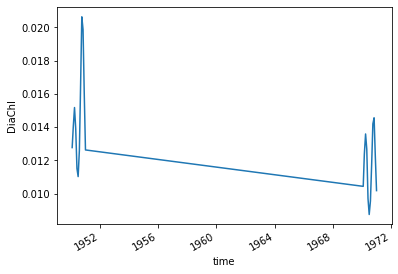

In [53]:
DiaChl_volmean.plot()

# Export to HTML

In [ ]:
%autosave 2

!jupyter nbconvert MZ_F2R_sensitivity_runs_vardegChl.ipynb --output-dir=$htmlpath --output $htmlname --to html

Autosaving every 2 seconds
[NbConvertApp] Converting notebook MZ_F2R_sensitivity_runs_vardegChl.ipynb to html
